# Ajust de conjunts de dades a distribucions de densitat de probabilitat

En els exemples següents es mostra com podem fer un ajust de conjunts de dades a diferents distribucions de densitat de probabilitat.
Per fer això s'utilitza la llibreria d'estadístics del paquet scipy (algorismes i càlcul científic en python).
S'utilitza el test de Kolmogorov-Smirnoff (KS) tal com vem explicar a classe.

Si en voleu saber més:
- [Distribucions a SciPy](https://docs.scipy.org/doc/scipy/tutorial/stats/probability_distributions.html)
- [Test de Kolmogorov-Smirnoff](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)

In [1]:
# First run all the imports
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exponencial sintètica

En primer lloc es mostra com fer l'ajust amb dades d'una distribució exponencial que s'han generat sintèticament EXPO(10)

El codi fuinciona de la següent manera:
1. Es carrega el fitxer de dades (en aquest cas 1000 valors)
2. Expressem en una llista contra quines distribucions volem fer el test KS (es comprova que la distribució existeixi a SciPy) i fem el test
3. Ordenem el resultat del test KS de menor (millor) a major (pitjor)
4. Mostrem tots els resultats i grafiquem l'histograma (Struges') i el millor ajust

Test results:
Distribution: expon;  KS: 0.029; p-value: 0.345 - Parameters: (0.005, 10.030)
Distribution: lognorm;  KS: 0.035; p-value: 0.176 - Parameters: (1.002, -0.587, 6.788)
Distribution: invweibull;  KS: 0.046; p-value: 0.028 - Parameters: (1.898, -4.111, 8.508)
Distribution: beta;  KS: 0.085; p-value: 0.000 - Parameters: (1.643, 386416455021954.375, -0.368, 2105084440360349.250)
Distribution: gumbel_r;  KS: 0.104; p-value: 0.000 - Parameters: (5.890, 6.254)
Distribution: norm;  KS: 0.165; p-value: 0.000 - Parameters: (10.035, 10.291)
Distribution: chi2;  KS: 0.394; p-value: 0.000 - Parameters: (2.099, 0.005, 1.498)
Distribution: gamma;  KS: 0.469; p-value: 0.000 - Parameters: (1.652, 0.004, 1.628)
Best fit: expon
Parameters: (0.0054611399009890016, 10.0299409477061)
KS Statistic: 0.0294, p-value: 0.3450


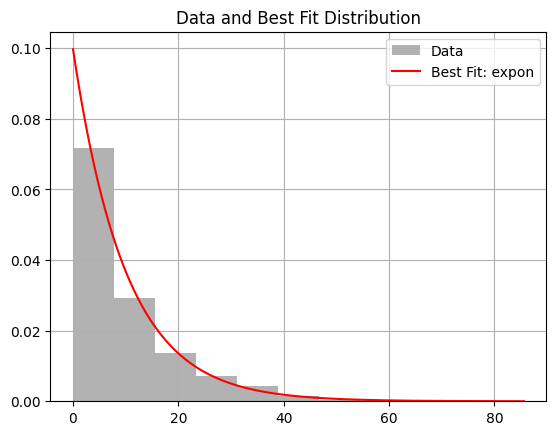

In [2]:
# Fitting a dataset from CSV to various probability distributions
# Load the CSV data into a pandas dataframe
csv_file = 'data_expo_sintetica.csv'
df = pd.read_csv(csv_file, header=None)
data = df[0].dropna().values  # Drop missing values if any

# Candidate distributions to check
distributions = ['norm', 'expon', 'lognorm', 'gamma', 'beta', 'gumbel_r', 'invweibull', 'chi2'] # gumbel_r, invweibul are Weibull types
# Store results
results = []
# Fit each distribution and calculate the Kolmogorov–Smirnov statistic
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    D, p = stats.kstest(data, dist_name, args=params)
    results.append((dist_name, params, D, p))

# Sort results by KS statistic (lower is better)
results.sort(key=lambda x: x[2])
print("Test results:")
for result in results:
    params_str = ", ".join(f"{param:.3f}" for param in result[1])
    print(f"Distribution: {result[0]};  KS: {result[2]:.3f}; p-value: {result[3]:.3f} - Parameters: ({params_str})")
# Show top result
best_dist_name, best_params, best_D, best_p = results[0]
print(f"Best fit: {best_dist_name}")
print(f"Parameters: {best_params}")
print(f"KS Statistic: {best_D:.4f}, p-value: {best_p:.4f}")

# Plot the histogram and best-fit PDF
plt.hist(data, bins=math.ceil(math.log2(df.shape[0])+1), density=True, alpha=0.6, color='gray', label='Data') # bun follow Sturges' law

x = np.linspace(min(data), max(data), df.shape[0])
pdf = getattr(stats, best_dist_name).pdf(x, *best_params)
plt.plot(x, pdf, 'r-', label=f'Best Fit: {best_dist_name}')

plt.title("Data and Best Fit Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Interpretació dels resultats

- KS és el valor obtingut en el test de Kolmogofov-Smirnoff (millor com més petit)
- p-value és el valor del test d'hipòtesi assumint la hipòtesi nula com a certa
- parameters són els paràmetrs que millor ajusten a cada distribució.

Com que les distribucions implementades a SciPy són molt flexibles, podeu veure, per exemple que per l'exponencial hi ha dos paràmetres, mentre a classe solament se n'ha utilitzat un (la mitjana). En aquest cas l'exponencial té un paràmetre addicional que és la separació del 0. O sigui en Arena fariem P0 + EXPO(P1), on P0 és el primer paràmetre que correspon al desplaçament i P1 el segon, que correspon a la mitjana o beta de l'exponencial.
L'ajust no seà mai perfecte, degut al nombre de mostres.

En l'exemple següent s'ha afegit 5 als valors de l'exponencial i si n'observem els paràmetres la mitjana continua essént 10, però el desplaçament respecte al zero és 5.

Test results:
Distribution: gamma;  KS: 0.022; p-value: 0.698 - Parameters: (0.955, 5.005, 10.500)
Distribution: expon;  KS: 0.029; p-value: 0.345 - Parameters: (5.005, 10.030)
Distribution: beta;  KS: 0.030; p-value: 0.337 - Parameters: (0.937, 27.038, 5.005, 301.631)
Distribution: lognorm;  KS: 0.035; p-value: 0.176 - Parameters: (1.002, 4.413, 6.788)
Distribution: invweibull;  KS: 0.046; p-value: 0.028 - Parameters: (1.898, 0.889, 8.508)
Distribution: gumbel_r;  KS: 0.104; p-value: 0.000 - Parameters: (10.890, 6.254)
Distribution: chi2;  KS: 0.161; p-value: 0.000 - Parameters: (1.468, 5.005, 4.659)
Distribution: norm;  KS: 0.165; p-value: 0.000 - Parameters: (15.035, 10.291)
Best fit: gamma
Parameters: (np.float64(0.9552794065378187), np.float64(5.005461139900988), np.float64(10.499779505152986))
KS Statistic: 0.0222, p-value: 0.6982


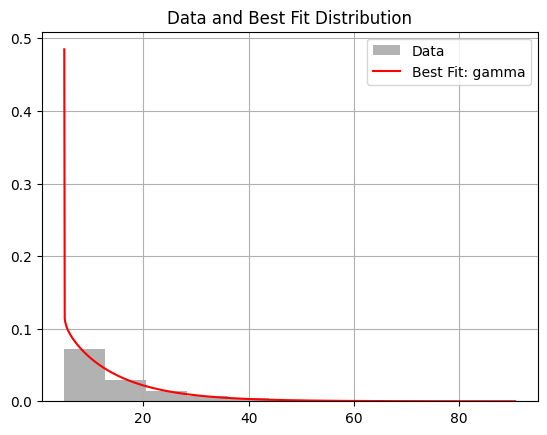

In [3]:
# Fitting a dataset from CSV to various probability distributions
# Load the CSV data into a pandas dataframe
csv_file = 'data_expo_sintetica_5.csv'
df = pd.read_csv(csv_file, header=None)
data = df[0].dropna().values  # Drop missing values if any

# Candidate distributions to check
distributions = ['norm', 'expon', 'lognorm', 'gamma', 'beta', 'gumbel_r', 'invweibull', 'chi2'] # gumbel_r, invweibul are Weibull types
# Store results
results = []
# Fit each distribution and calculate the Kolmogorov–Smirnov statistic
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    D, p = stats.kstest(data, dist_name, args=params)
    results.append((dist_name, params, D, p))

# Sort results by KS statistic (lower is better)
results.sort(key=lambda x: x[2])
print("Test results:")
for result in results:
    params_str = ", ".join(f"{param:.3f}" for param in result[1])
    print(f"Distribution: {result[0]};  KS: {result[2]:.3f}; p-value: {result[3]:.3f} - Parameters: ({params_str})")
# Show top result
best_dist_name, best_params, best_D, best_p = results[0]
print(f"Best fit: {best_dist_name}")
print(f"Parameters: {best_params}")
print(f"KS Statistic: {best_D:.4f}, p-value: {best_p:.4f}")

# Plot the histogram and best-fit PDF
plt.hist(data, bins=math.ceil(math.log2(df.shape[0])+1), density=True, alpha=0.6, color='gray', label='Data') # bun follow Sturges' law

x = np.linspace(min(data), max(data), df.shape[0])
pdf = getattr(stats, best_dist_name).pdf(x, *best_params)
plt.plot(x, pdf, 'r-', label=f'Best Fit: {best_dist_name}')

plt.title("Data and Best Fit Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Interpretació dels resultats

Com s'ha explicat anteriorment en aquest exemple s'ha desplaçat 5 unitats una exponencial de mitjana 10. En l'ajust de l'exponencial es trova un valor de aproximat de 5 en el valor del desplaçament i aproximat a 10 en la mitjana.

En aquest exemple és on es pot veure que cal tenir en compte el significat de les distribucions. La distribució que millor ajusta és una distribució gamma, però ja es veu quan s'interpreta l'histograma és un ajust matemàticament correcte, però s'està "forçant" la distribució gamma, i triariem l'exponencial en un cas real si les dades corresponen a un temps entre arribades.

Es pot veure l'ajust exponencial a la gràfica següent.

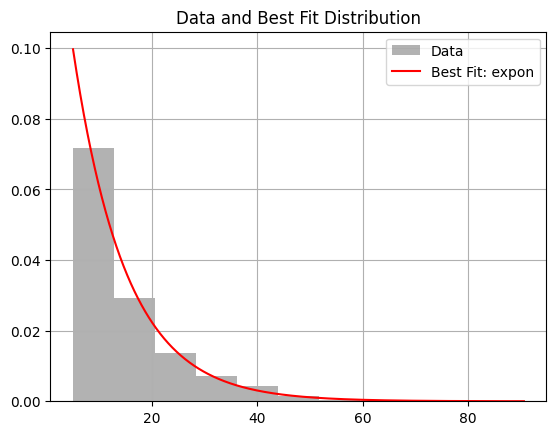

In [4]:
best_dist_name, best_params, best_D, best_p = results[1]
# Plot the histogram and best-fit PDF
plt.hist(data, bins=math.ceil(math.log2(df.shape[0])+1), density=True, alpha=0.6, color='gray', label='Data') # bun follow Sturges' law

x = np.linspace(min(data), max(data), df.shape[0])
pdf = getattr(stats, 'expon').pdf(x, *best_params)
plt.plot(x, pdf, 'r-', label=f'Best Fit: {best_dist_name}')

plt.title("Data and Best Fit Distribution")
plt.legend()
plt.grid(True)
plt.show()

Als conjunts de dades data_0 i data_1 tenu dades per poder fer l'ajust vosaltres d'una normal i una normal truncada.